В данном проекте я проанализирую датасет опроса в Великобритании, который позволит сравнить курящих с некурящими и сделать выводы на основе этого сравнения.

Импорт библиотек pandas, seaborn, matplotlib 

In [150]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

Открываем файл

In [151]:
smok = pd.read_csv('smoking.csv')
smok.head()

,Unnamed: 0,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,1,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
1,2,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
2,3,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN
3,4,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN
4,5,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN


Важная информация об этом датасете

In [152]:
smok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1691 non-null   int64  
 1   gender                 1691 non-null   object 
 2   age                    1691 non-null   int64  
 3   marital_status         1691 non-null   object 
 4   highest_qualification  1691 non-null   object 
 5   nationality            1691 non-null   object 
 6   ethnicity              1691 non-null   object 
 7   gross_income           1691 non-null   object 
 8   region                 1691 non-null   object 
 9   smoke                  1691 non-null   object 
 10  amt_weekends           421 non-null    float64
 11  amt_weekdays           421 non-null    float64
 12  type                   421 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 171.9+ KB


Проверяем наличие пустых значений

In [153]:
smok.isnull().sum()

Unnamed: 0                  0
gender                      0
age                         0
marital_status              0
highest_qualification       0
nationality                 0
ethnicity                   0
gross_income                0
region                      0
smoke                       0
amt_weekends             1270
amt_weekdays             1270
type                     1270
dtype: int64

Замечаем пустые значения в колонках, содержащих информацию о количестве сирагет, у некурящих людей. Удаляем ненужную первую колонку

In [154]:
smok.drop(['Unnamed: 0'],  axis= 1 , inplace= True)
smok

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
1,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
2,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN
3,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN
4,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1686,Male,22,Single,No Qualification,Scottish,White,"2,600 to 5,200",Scotland,No,NaN,NaN,NaN
1687,Female,49,Divorced,Other/Sub Degree,English,White,"2,600 to 5,200",Scotland,Yes,20.0,20.0,Hand-Rolled
1688,Male,45,Married,Other/Sub Degree,Scottish,White,"5,200 to 10,400",Scotland,No,NaN,NaN,NaN
1689,Female,51,Married,No Qualification,English,White,"2,600 to 5,200",Scotland,Yes,20.0,20.0,Packets


Затем переходим к вопросам, с помощью которых я проведу исследование

1. Сколько процентов курящих людей?

Объективно ответим на этот вопрос, построив диаргамму

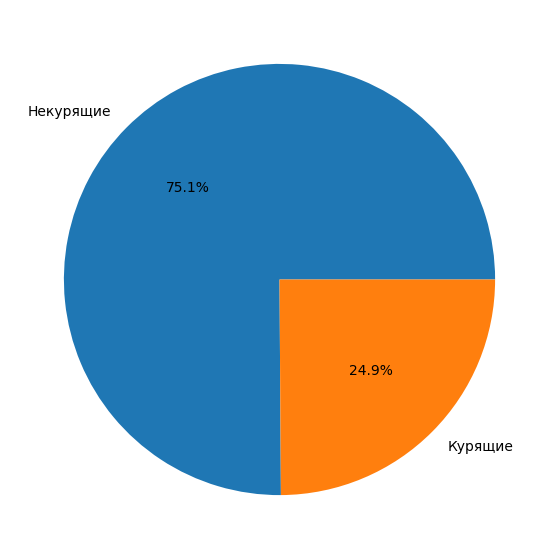

In [155]:
plt.figure(figsize=(7, 7))
plt.pie(smok['smoke'].value_counts(), labels= ['Некурящие', 'Курящие'], autopct='%1.1f%%')
plt.show()

Исходя из диаграммы, каждый 4 человек в Великобритании курит

2. Кто курит чаще: мужчины или женщины?

Сперва на основе исходного датасета создадим датасет, где будут только курящие

In [156]:
yes_smoke = smok[smok['smoke'] == 'Yes']
yes_smoke.head()

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
1,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
6,Male,53,Married,Degree,British,White,"Above 36,400",The North,Yes,6.0,6.0,Packets
8,Male,40,Single,GCSE/CSE,English,White,"2,600 to 5,200",The North,Yes,8.0,8.0,Hand-Rolled
9,Female,41,Married,No Qualification,English,White,"5,200 to 10,400",The North,Yes,15.0,12.0,Packets
20,Female,34,Married,GCSE/CSE,British,White,"2,600 to 5,200",The North,Yes,6.0,12.0,Packets


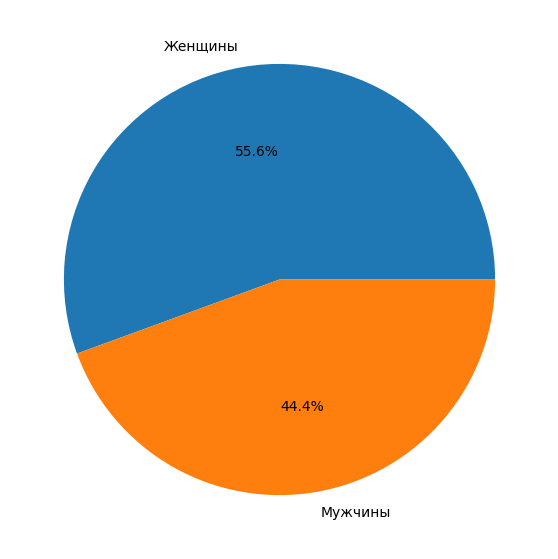

In [157]:
plt.figure(figsize=(7, 7))
plt.pie(yes_smoke['gender'].value_counts(), labels= ['Женщины', 'Мужчины'], autopct='%1.1f%%')
plt.show()

В Великобритании среди курильщиков больше женщин, чем мужчин

3. Какой средний возраст курильщика в Великобритании?

Переводим колонку в список и делим сумму списка на его длину

In [158]:
avg_age = []
for i in yes_smoke['age']:
    avg_age.append(i)
sum(avg_age) / len(avg_age)

42.71496437054632

Получаем средний возраст курильщика в Великобритании ~43 года

4. Какой средний возраст некурящего в Великобритании?

Создаем датасет с некурящими

In [159]:
no_smoke = smok[smok['smoke'] == 'No']
no_smoke.head()

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
2,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN
3,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN
4,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
5,Female,37,Married,GCSE/O Level,British,White,"15,600 to 20,800",The North,No,NaN,NaN,NaN


Аналогично считаем средний возраст некурящих

In [160]:
avg_age = []
for i in no_smoke['age']:
    avg_age.append(i)
sum(avg_age) / len(avg_age)

52.196850393700785

Средний возраст некурящих ~52 года, что на 9 лет больше, чем у курящих

5. Какое семейное положение у курящих?

Заменяем значения в колонке с данными у статусе курения на числовые, для более удобного отображения на графике

In [161]:
smok.loc[smok['smoke'] == 'Yes', 'smoke'] = 1
smok.loc[smok['smoke'] == 'No', 'smoke'] = 0
smok

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,0,NaN,NaN,NaN
1,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,1,12.0,12.0,Packets
2,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,0,NaN,NaN,NaN
3,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,0,NaN,NaN,NaN
4,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1686,Male,22,Single,No Qualification,Scottish,White,"2,600 to 5,200",Scotland,0,NaN,NaN,NaN
1687,Female,49,Divorced,Other/Sub Degree,English,White,"2,600 to 5,200",Scotland,1,20.0,20.0,Hand-Rolled
1688,Male,45,Married,Other/Sub Degree,Scottish,White,"5,200 to 10,400",Scotland,0,NaN,NaN,NaN
1689,Female,51,Married,No Qualification,English,White,"2,600 to 5,200",Scotland,1,20.0,20.0,Packets


Составляем диаграмму

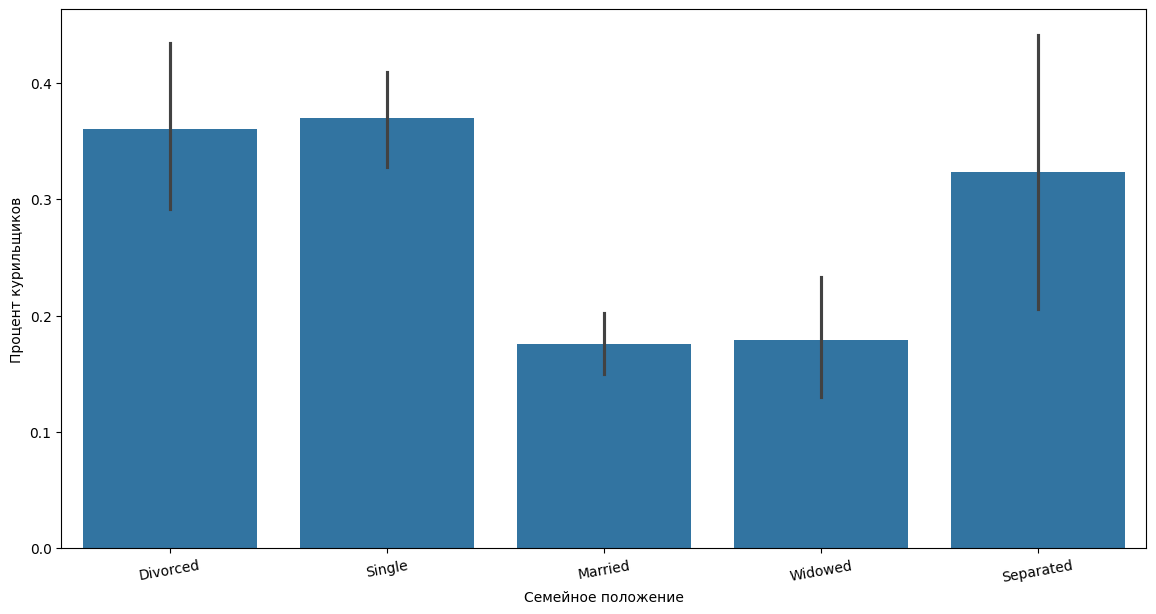

In [164]:
plt.figure(figsize=(14, 7))
sns.barplot(x=smok['marital_status'], y=smok['smoke'])
plt.xticks(rotation=10)
plt.xlabel('Семейное положение')
plt.ylabel('Процент курильщиков')
plt.show()

Среди одиноких и разведенных больше курящих, чем среди женатых

6. Сколько в среднем сигарет выкуривают курящие в день?

Переводим в список колонки со средним количеством сигарет в выходные и будние дни и считаем деля сумму на длину списка

In [172]:
kurit = []
for i in yes_smoke['amt_weekdays']:
    kurit.append(i)
for i in yes_smoke['amt_weekdays']:
    kurit.append(i)
sum(kurit) / len(kurit)

13.750593824228028

В среднем курильщик выкуривает около 14 сигарет в день

7. Какой доход у курящих?

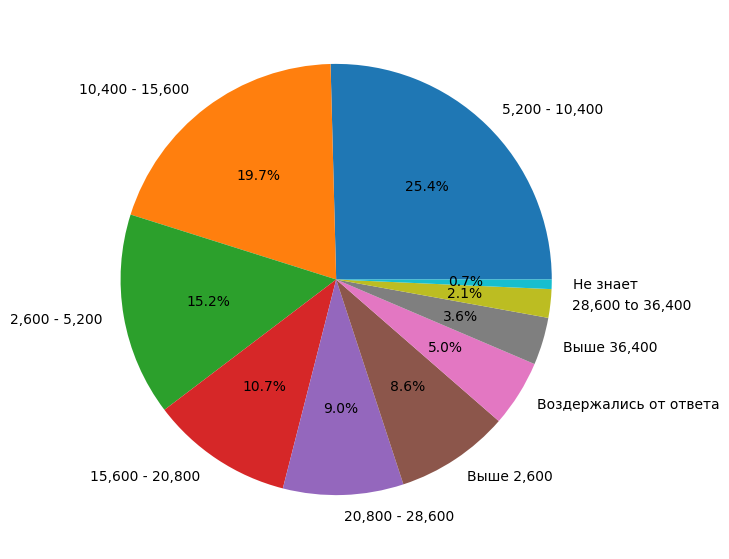

In [171]:
plt.figure(figsize=(7, 7))
plt.pie(yes_smoke['gross_income'].value_counts(), labels= ['5,200 - 10,400', '10,400 - 15,600 ', '2,600 - 5,200', '15,600 - 20,800 ', '20,800 - 28,600 ', 'Выше 2,600', 'Воздержались от ответа', 'Выше 36,400 ', '28,600 to 36,400', 'Не знает',], autopct='%1.1f%%')
plt.show()

Данное исследование показывает, что курение сильно влияет на жизнь курильщика. Продолжительность жизни курильщика меньше, курильщикам сложнее завести отношения. Также для меня было удивлением то, что в Великобритании среди курильщиков больше женщин, чем мужчин. Но это не так важно. Важно думать о своем здоровье, и данное исследование показывает, что курение вредит здоровью. Следовательно напришивается главный вывод: Курение действительно убивает